In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import utils as utils
import matplotlib.pyplot as plt
import evaluations

# Task 1 : KNN with 4 features

### loading 30s dataset

In [2]:
df = utils.task1_df()
df.head()

,spectral_rolloff_mean,mfcc_1_mean,spectral_centroid_mean,tempo,Type,GenreID
0,5351.909304,9.675074,2569.255823,117.453835,Train,0
1,6839.566975,-63.635056,2844.070408,107.666016,Train,0
2,6873.341771,-119.346458,2765.648135,161.499023,Train,0
3,7534.996104,-26.936581,3634.106564,117.453835,Train,0
4,7879.044023,-8.531343,3671.260489,129.199219,Train,0


In [3]:
X_train_scaled, y_train, X_test_scaled, y_test = utils.train_val_split(df)

### Begin knn training

In [4]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, weights='uniform')# Fit the classifier to the data
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [5]:
y_pred = knn.predict(X_test_scaled)

### Evaluation

Confusion Matrix

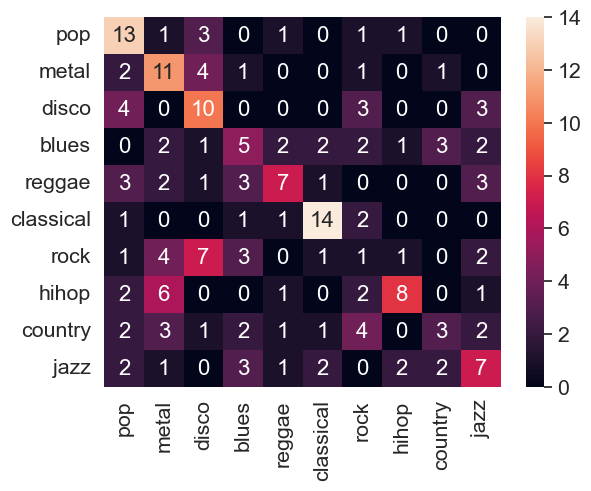

In [6]:
evaluations.conf_matrix(y_pred, y_test)

Sensitivity and Specificity for each class

In [7]:
p = evaluations.multiclass_performance_metrics(y_pred, y_test)
print(f"Accuracy : {p.tp.sum()/len(y_pred)}\n"
      f"Macro F1 score : {p.F1Score.mean()}")
p

Accuracy : 0.398989898989899
Macro F1 score : 0.38651442702025673


,tp,tn,fp,fn,F1Score
pop,13,161,17,7,0.520000
metal,11,159,19,9,0.440000
disco,10,161,17,10,0.425532
blues,5,165,13,15,0.263158
reggae,7,171,7,13,0.411765
classical,14,172,7,5,0.700000
rock,1,163,15,19,0.055556
hihop,8,173,5,12,0.484848
country,3,173,6,16,0.214286
jazz,7,165,13,13,0.350000


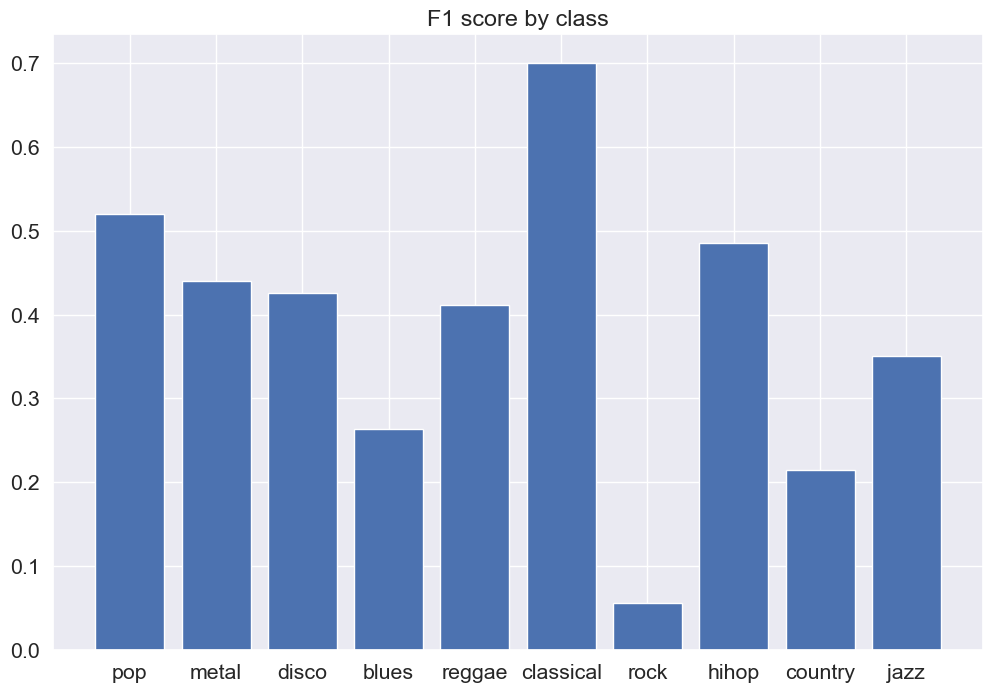

In [10]:
plt.figure(figsize=(12, 8))
plt.bar(utils.genreNames, p.F1Score)
plt.title("F1 score by class")
plt.show()